In [5]:
from helpers import *

In [6]:
# Specify test_file_path
# test_file_path = 
test = pd.read_csv('data/train.csv')
store = pd.read_csv('data/store.csv')

test = test.merge(store, how='left', on='Store')
test = date_convert(test)

In [7]:
# Transform features
test = data_transformation(test, typef='Test')

In [8]:
# One-hot-encode features using the transformer fit on the previous train data
test = one_hot_enc_test(test).drop(axis=1, labels='index')

In [9]:
X_test = test.drop(axis=1, labels='Sales')

In [24]:
X_test_arr = np.array(X_test)

In [21]:
def predict_stacked(X, models, coefs):
  #  pca = pickle.load(open("metadata/pca.pickle.dat", "rb"))
  #  X_pca = pca.transform(X)
    valid_models = {'xgb', 'rf'}
     #   if models.keys() not in valid_models:
     #       raise ValueError("Model names must be one of %r." % valid_models)

    #    if not type(models) == dict & type(coefs) == dict:
    #        raise ValueError('models and coefs are dictionaries, please support a dictionary')
    #    else:    
    xgb_mod = models['xgb']
    rf_mod = models['rf']
    #      el_net_mod = models['el_net']
    xgb_coef = coefs['xgb_coef']
    rf_coef = coefs['rf_coef']
      #      el_net_coef = coefs['el_net']

    return np.sum(xgb_coef * xgb_mod.predict(X) + rf_coed * rf_mod.predict(X))    

ValueError: feature_names mismatch: ['index', 'Customers', 'Year', 'Quarter', 'Month', 'Week', 'Day', 'Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoDuration', 'CompetitionActive', 'CompetitionDays', 'RunningAnyPromo', 'RunningPromo2', 'CompetitionIntensity', 'Rel', 'ExpectedSales', "('0.0',)", "('1.0',)", "('not_given',)", "('0',)", "('a',)", "('b',)", "('c',)", "('not_given',).1", "('0.0',).1", "('1.0',).1", "('not_given',).2", "('a',).1", "('b',).1", "('c',).1", "('d',)", "('a',).2", "('b',).2", "('c',).2", "('aa',)", "('ab',)", "('ac',)", "('ad',)", "('bb',)", "('ca',)", "('cb',)", "('cc',)", "('cd',)"] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46']
expected ('c',), Quarter, ('b',).2, ('cc',), ('b',).1, ('ab',), Week, index, PromoDuration, Rel, ('1.0',).1, ('1.0',), RunningAnyPromo, ('bb',), Day, ('d',), ('not_given',), CompetitionActive, ('0',), ('cb',), CompetitionIntensity, ('c',).2, Promo2SinceYear, CompetitionDistance, CompetitionOpenSinceMonth, ('a',), Promo2SinceWeek, ('0.0',), Month, ('aa',), CompetitionOpenSinceYear, RunningPromo2, Store, ('not_given',).2, CompetitionDays, ('a',).1, ExpectedSales, ('ad',), ('ac',), ('ca',), ('cd',), ('c',).1, ('0.0',).1, Customers, Year, ('b',), ('a',).2, ('not_given',).1 in input data
training data did not have the following fields: f21, f25, f16, f27, f35, f46, f40, f4, f1, f13, f45, f23, f24, f39, f33, f9, f12, f15, f26, f17, f32, f38, f20, f29, f0, f37, f6, f30, f42, f41, f10, f36, f3, f22, f34, f44, f11, f19, f18, f43, f28, f8, f31, f5, f14, f7, f2

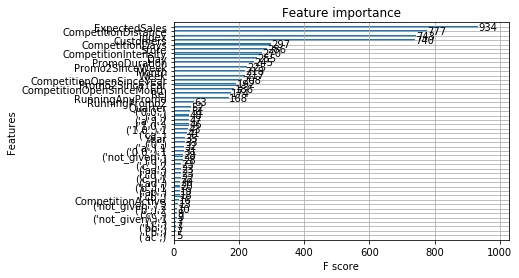

In [25]:
# Load models, show feature importance for XGB and RF and use predict
#with open('metadata/stack_params.txt') as f:
#    lines = f.read()
#stack_params = ast.literal_eval(lines)
#best_stack_params = min(stack_params, key=itemgetter(3))[0:3]

models = {
    'xgb' : pickle.load(open("metadata/xgb_model.pickle.dat", "rb")),
    'rf' : pickle.load(open("metadata/xgb_model.pickle.dat", "rb"))
 #   'el_net' : pickle.load(open("metadata/xgb_model.pickle.dat", "rb")) 
}

'''
coefs = {
    'xgb_coef' : best_stack_params[0],
    'rf_coef' : best_stackmodelsams[1],
    'el_coef' : best_stack_params[2]
}
'''

coefs = {
    'xgb_coef' : 0.3,
    'rf_coef' : 0.3,
#    'el_coef' : 0.3
}


# Print feature importance
#xgb.plot_importance(models['xgb'], max_num_features=49, height=0.5)

# Test
predictions = predict_stacked(X_test_arr, models=models, coefs=coefs)